# Correction of practice 7

In [2]:
import pandas as pd
import csv

In [3]:
list_of_symbols = []
with open(r"D:\KBTU\2022-2023\Python Course\Course\Pratices\Practice_7\list_symbols_euronext.csv", 'r') as file:
    csvfile = csv.reader(file)
    for row in csvfile:
        list_of_symbols += row
#         for i in row:
#             list_of_symbols.append(i)
        break
print(len(list_of_symbols))

1764


In [4]:
with open(r"D:\KBTU\2022-2023\Python Course\Course\Pratices\Practice_7\list_symbols_US.csv", 'r') as file:
    csvfile = csv.reader(file)
    for row in csvfile:
        list_of_symbols += row
#         for i in row:
#             list_of_symbols.append(i)
        break
print(len(list_of_symbols))

10045


In [7]:
list_df = []
for i in list_of_symbols[:10]:
    print(i)
    try:
        df_temp = pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/"+i+"?period1=0&period2=1661904000&interval=1d&events=history&includeAdjustedClose=true")
        df_temp['SYMBOL'] = i
        list_df.append(df_temp)
        
    except:
        print('error')
df = pd.concat(list_df, ignore_index = True)
print(df)

ALMIL.PA
2020.OL
2CRSI.PA
5PG.OL
MLATV.PA
error
ALAST.PA
AALB.AS
AASB.OL
ABI.BR
AB.PA
             Date       Open       High        Low      Close  Adj Close  \
0      2006-02-08  23.299999  23.299999  23.299999  23.299999  20.706810   
1      2006-02-09  17.950001  17.950001  17.950001  17.950001  15.952246   
2      2006-02-10  16.990000  16.990000  16.990000  16.990000  15.099090   
3      2006-02-13  18.059999  18.059999  18.059999  18.059999  16.050001   
4      2006-02-14  19.000000  19.000000  19.000000  19.000000  16.885384   
...           ...        ...        ...        ...        ...        ...   
30232  2022-08-24   7.500000   7.500000   7.280000   7.380000   7.380000   
30233  2022-08-25   8.280000   9.400000   8.260000   8.800000   8.800000   
30234  2022-08-26   8.640000   9.070000   8.570000   8.910000   8.910000   
30235  2022-08-29   8.720000   9.045000   8.600000   8.870000   8.870000   
30236  2022-08-30   8.950000   9.095000   8.860000   9.025000   9.025000   

 

In [ ]:
#to use read and to parquet => "pip install pyarrow" and "pip install fastparquet"

In [8]:
df.to_csv(r"D:\KBTU\2022-2023\Python Course\Course\Pratices\Practice_7\the_csv_version.csv")

In [9]:
df.to_parquet(r"D:\KBTU\2022-2023\Python Course\Course\Pratices\Practice_7\the_parquet_version.parquet")

# Lecture 8: Data graph

In [10]:
#import
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
#load our data
#"pip install pyarrow" and "pip install fastparquet"
df_origin = pd.read_parquet(r"D:\KBTU\2022-2023\Python Course\Course\Lecture\Lecture_8\df_final_US_EUR.parquet")


In [12]:
print(df_origin)

               Date  Open   High   Low  Close  Adj Close   Volume      Name
0        2008-01-29  9.50   9.99  8.57   8.75   0.702589  1489000      AACG
1        2008-01-30  8.75   9.15  8.30   8.50   0.682516   219000      AACG
2        2008-01-31  8.49  10.30  8.49   9.55   0.766826   182300      AACG
3        2008-02-01  9.93   9.94  9.50   9.51   0.763614    28200      AACG
4        2008-02-04  9.50   9.71  9.50   9.50   0.762811     8300      AACG
...             ...   ...    ...   ...    ...        ...      ...       ...
27247611 2022-08-24  9.54   9.54  7.75   9.00   9.000000   125933  ZWIPE.OL
27247612 2022-08-25  8.79   9.99  8.03   9.34   9.340000   159549  ZWIPE.OL
27247613 2022-08-26  8.95   9.29  8.00   8.30   8.300000    17487  ZWIPE.OL
27247614 2022-08-29  8.12   8.61  7.86   7.98   7.980000    58661  ZWIPE.OL
27247615 2022-08-30  7.70   8.52  7.60   8.33   8.330000     7684  ZWIPE.OL

[27247616 rows x 8 columns]


In [14]:
#Select only a part of the data and reset_index (drop = True)
df_select = df_origin[df_origin['Name'] == 'GOOGL']
df_select.reset_index(inplace = True, drop = True)
print(df_select)

           Date        Open        High         Low       Close   Adj Close  \
0    2004-08-19    2.502503    2.604104    2.401401    2.511011    2.511011   
1    2004-08-20    2.527778    2.729730    2.515015    2.710460    2.710460   
2    2004-08-23    2.771522    2.839840    2.728979    2.737738    2.737738   
3    2004-08-24    2.783784    2.792793    2.591842    2.624374    2.624374   
4    2004-08-25    2.626627    2.702703    2.599600    2.652653    2.652653   
...         ...         ...         ...         ...         ...         ...   
4535 2022-08-24  113.500000  114.779999  112.870003  113.690002  113.690002   
4536 2022-08-25  114.239998  116.720001  114.110001  116.650002  116.650002   
4537 2022-08-26  114.720001  115.120003  110.190002  110.339996  110.339996   
4538 2022-08-29  109.989998  110.949997  108.800003  109.419998  109.419998   
4539 2022-08-30  110.169998  110.500000  107.800003  108.940002  108.940002   

         Volume   Name  
0     893181924  GOOGL  
1

In [ ]:
#install packages:
#pip install matplotlib

<AxesSubplot:>

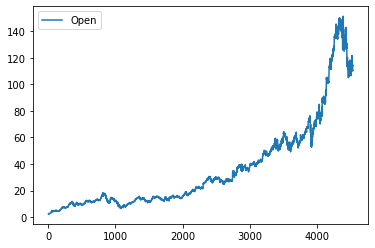

In [15]:
#Make you first plot without x axis (default is index)
df_select.plot(y = 'Open')

<AxesSubplot:xlabel='Date'>

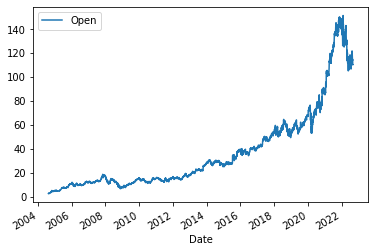

In [17]:
#you can also use another column as x axis
df_select.plot(x = 'Date', y = 'Open')

In [18]:
#You can select even smaller amount of data
df_select = df_select[df_select['Date'] > datetime.datetime(2022,8,1)]
print(df_select)

           Date        Open        High         Low       Close   Adj Close  \
4519 2022-08-02  114.000000  116.349998  113.720001  115.129997  115.129997   
4520 2022-08-03  115.709999  118.620003  115.480003  118.080002  118.080002   
4521 2022-08-04  117.480003  118.779999  116.889999  118.190002  118.190002   
4522 2022-08-05  116.230003  118.110001  116.000000  117.470001  117.470001   
4523 2022-08-08  118.389999  120.150002  116.879997  117.300003  117.300003   
4524 2022-08-09  117.139999  117.320000  115.709999  116.629997  116.629997   
4525 2022-08-10  118.779999  120.919998  118.410004  119.699997  119.699997   
4526 2022-08-11  121.279999  121.489998  118.559998  118.839996  118.839996   
4527 2022-08-12  120.260002  121.680000  119.459999  121.680000  121.680000   
4528 2022-08-15  121.129997  122.300003  120.610001  122.080002  122.080002   
4529 2022-08-16  121.519997  122.430000  120.639999  121.699997  121.699997   
4530 2022-08-17  120.120003  121.290001  119.379997 

<AxesSubplot:xlabel='Date'>

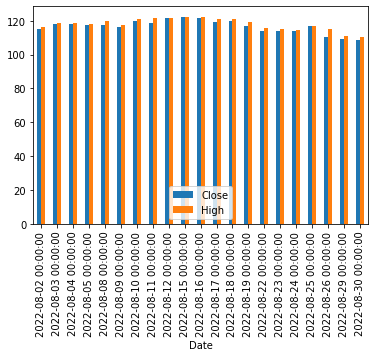

In [20]:
#use the bar kind
#use the kind attribute
df_select.plot(kind = 'bar', x = 'Date', y = ['Close', 'High'])

<AxesSubplot:ylabel='Date'>

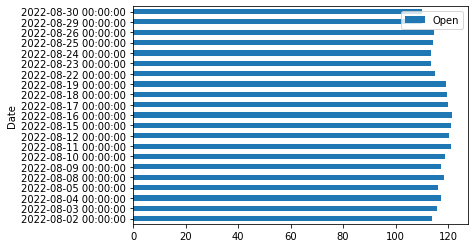

In [21]:
#use the horizontal bar kind
df_select.plot(kind = 'barh', x = 'Date', y = 'Open')

<AxesSubplot:ylabel='Frequency'>

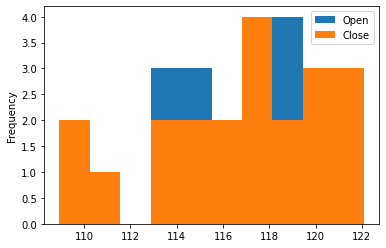

In [24]:
# use the histogram
df_select.plot(kind = 'hist', y = ['Open', 'Close'])

<AxesSubplot:>

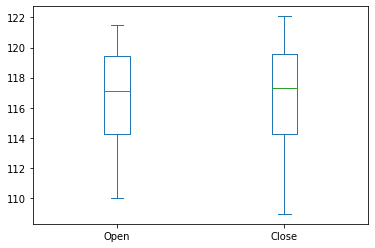

In [25]:
# use the boxplot (kind  = 'box')
df_select.plot(kind = 'box', y = ['Open', 'Close'])

<AxesSubplot:>

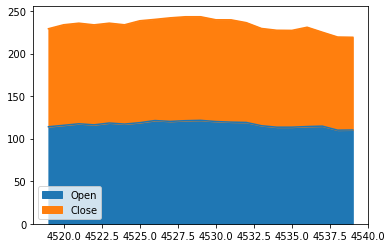

In [26]:
# use the area
df_select.plot(kind = 'area', y = ['Open', 'Close'])

<AxesSubplot:xlabel='Date', ylabel='Open'>

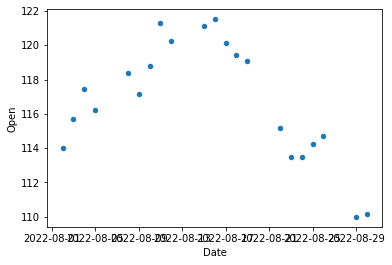

In [29]:
#the scatter version
df_select.plot(kind = 'scatter', x = 'Date', y = 'Open')

<AxesSubplot:xlabel='High', ylabel='Open'>

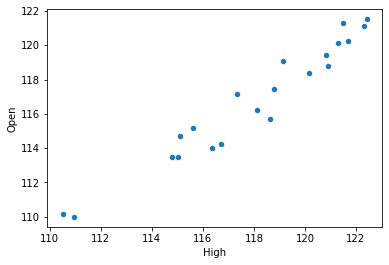

In [30]:
df_select.plot(kind = 'scatter', x = 'High', y = 'Open')

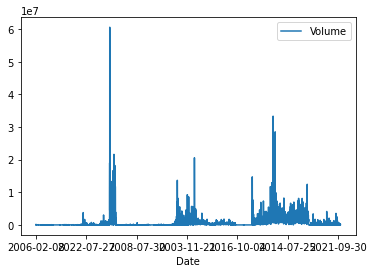

<AxesSubplot:xlabel='Open', ylabel='Volume'>

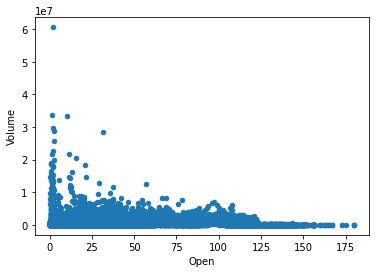

In [35]:
#YOUR TURN (15 minutes)(with my parquet file install pyarrow and fastparquet package first)
#) or any csv data (price))
#%matplotlib inline
#Draw the evolution of the volume with the date in line
#Draw the scatter plot of the volume in function of the Open price
#import matplotlib.pyplot as plt
#plt.show()
import matplotlib.pyplot as plt

df.plot(x = 'Date', y = 'Volume')
plt.show()
df.plot(kind = 'scatter', x = 'Open', y = 'Volume')

In [43]:
# Add column:
#percentage change for 'Open'
#price_day(i) - price_day(i-1) / price_day(i) *100
df = df_origin[df_origin['Name'] == 'GOOGL'].copy()
df.reset_index(inplace = True, drop = True)
perc = []
for index, line in df.iterrows():
    if index == 0:
        perc.append(0)
    else:
        perc.append((line['Open'] - df.loc[index-1, 'Open'] ) / line['Open'] *100)

df['perc_Open'] = perc
print(df)

           Date        Open        High         Low       Close   Adj Close  \
0    2004-08-19    2.502503    2.604104    2.401401    2.511011    2.511011   
1    2004-08-20    2.527778    2.729730    2.515015    2.710460    2.710460   
2    2004-08-23    2.771522    2.839840    2.728979    2.737738    2.737738   
3    2004-08-24    2.783784    2.792793    2.591842    2.624374    2.624374   
4    2004-08-25    2.626627    2.702703    2.599600    2.652653    2.652653   
...         ...         ...         ...         ...         ...         ...   
4535 2022-08-24  113.500000  114.779999  112.870003  113.690002  113.690002   
4536 2022-08-25  114.239998  116.720001  114.110001  116.650002  116.650002   
4537 2022-08-26  114.720001  115.120003  110.190002  110.339996  110.339996   
4538 2022-08-29  109.989998  110.949997  108.800003  109.419998  109.419998   
4539 2022-08-30  110.169998  110.500000  107.800003  108.940002  108.940002   

         Volume   Name  perc_Open  
0     893181924

In [45]:
#YOUR TURN (10 minutes)
#Add the percentage change for all prices column and the volume
print(df.columns)
col = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for i in col:
    perc = []
    for index, line in df.iterrows():
        if index == 0:
            perc.append(0)
        else:
            perc.append((line[i] - df.loc[index-1, i] ) / line[i] *100)

    df['perc_'+i] = perc
print(df)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Name',
       'perc_Open'],
      dtype='object')
           Date        Open        High         Low       Close   Adj Close  \
0    2004-08-19    2.502503    2.604104    2.401401    2.511011    2.511011   
1    2004-08-20    2.527778    2.729730    2.515015    2.710460    2.710460   
2    2004-08-23    2.771522    2.839840    2.728979    2.737738    2.737738   
3    2004-08-24    2.783784    2.792793    2.591842    2.624374    2.624374   
4    2004-08-25    2.626627    2.702703    2.599600    2.652653    2.652653   
...         ...         ...         ...         ...         ...         ...   
4535 2022-08-24  113.500000  114.779999  112.870003  113.690002  113.690002   
4536 2022-08-25  114.239998  116.720001  114.110001  116.650002  116.650002   
4537 2022-08-26  114.720001  115.120003  110.190002  110.339996  110.339996   
4538 2022-08-29  109.989998  110.949997  108.800003  109.419998  109.419998   
4539 2022-

<AxesSubplot:xlabel='perc_Close', ylabel='perc_Open'>

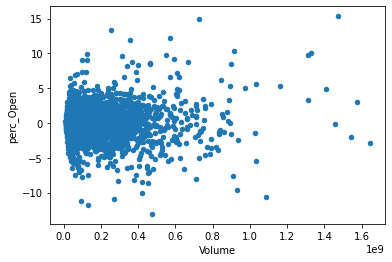

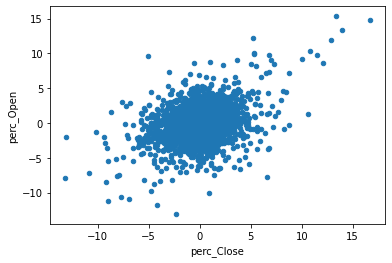

In [47]:
#print the link between datas (ex: perc or volume)
df.plot(kind = 'scatter', x = 'Volume', y = 'perc_Open')
df.plot(kind = 'scatter', x = 'perc_Close', y = 'perc_Open')

In [48]:
#Use matplotlib also
#https://matplotlib.org one of the most famous package to plot
# the command : "%matplotlib inline" may be necessary
import matplotlib.pyplot as plt

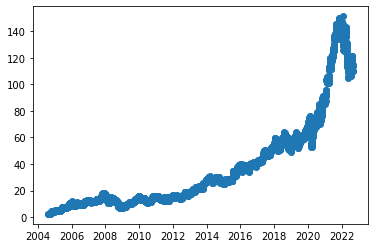

In [50]:
#create a figure with subplots and scatter
fig, ax = plt.subplots()
ax.scatter(df['Date'], df['Open'])
plt.show()

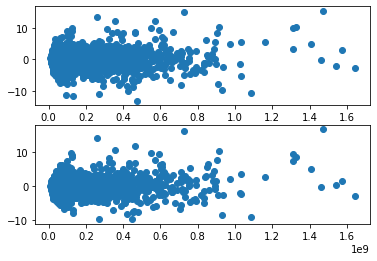

In [55]:
#Is the volume and the perc of change are linked? And the perc and the voume of the day before?
fig, ax = plt.subplots(2)
ax[0].scatter(df['Volume'], df['perc_Open'])
ax[1].scatter(df['Volume'], df['perc_High'])
plt.show()

In [56]:
#Seaborn to draw plots
#https://seaborn.pydata.org/
import seaborn as sns

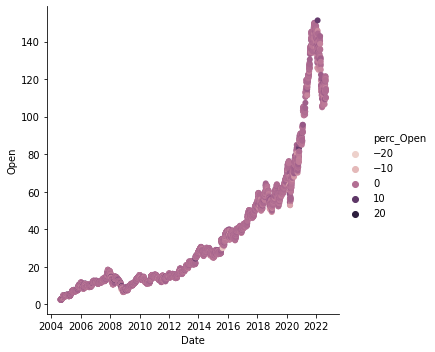

In [59]:
#draw your first plot, use data = df and the relplot() function, use linewidth to change the white order
sns.relplot(data = df, x = 'Date', y = 'Open', linewidth = 0, hue = 'perc_Open')

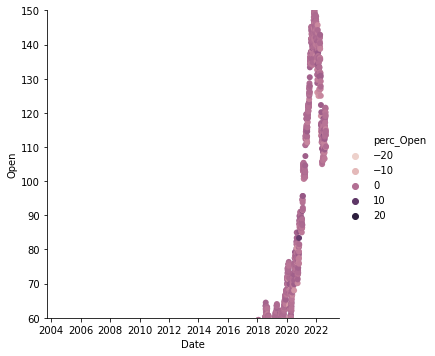

In [61]:
#Change min et max (ylim)
sns.relplot(data = df, x = 'Date', y = 'Open', linewidth = 0, hue = 'perc_Open')
plt.ylim(60, 150)
plt.show()

In [65]:
#another style with the set_style function
#list of style: https://seaborn.pydata.org/tutorial/aesthetics.html#seaborn-figure-styles
sns.set_style = "darkgrid"
sns.relplot(data = df, x = 'Date', y = 'Open', linewidth = 0, hue = 'perc_Open')

AttributeError: module 'seaborn' has no attribute 'scatter'

In [69]:
print(df.describe())

              Open         High          Low        Close    Adj Close  \
count  4540.000000  4540.000000  4540.000000  4540.000000  4540.000000   
mean     36.647923    37.013004    36.265625    36.647697    36.647715   
std      34.339561    34.699024    33.963791    34.338776    34.338773   
min       2.482232     2.546046     2.401401     2.502753     2.502753   
25%      12.544482    12.687688    12.413351    12.520834    12.520834   
50%      22.272649    22.426802    22.143518    22.245496    22.245496   
75%      52.716875    53.281250    52.099998    52.661750    52.661749   
max     151.250000   151.546494   148.899002   149.838501   149.838501   

             Volume    perc_Open    perc_High     perc_Low   perc_Close  \
count  4.540000e+03  4540.000000  4540.000000  4540.000000  4540.000000   
mean   1.266444e+08     0.064859     0.068729     0.067816     0.064772   
std    1.526405e+08     1.918341     1.652063     1.783251     1.906057   
min    9.312000e+06   -13.075485 